In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [164]:
# Load dataset
creditcard_df = pd.read_csv('C:/Users/User/PycharmProjects/mmakintosh_bank-segmentation/notebooks\CC_GENERAL.csv')


*  CUSTID: Identification of Credit Card holder
*  BALANCE: Balance amount left in customer's account to make purchases
*  BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
*  PURCHASES: Amount of purchases made from account
*  ONEOFFPURCHASES: Maximum purchase amount done in one-go
*  INSTALLMENTS_PURCHASES: Amount of purchase done in installment
*  CASH_ADVANCE: Cash in advance given by the user
*  PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
*  ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
*  PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
*  CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
*  CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
*  PURCHASES_TRX: Number of purchase transactions made
*  CREDIT_LIMIT: Limit of Credit Card for user
*  PAYMENTS: Amount of Payment done by user
*  MINIMUM_PAYMENTS: Minimum amount of payments made by user
*  PRC_FULL_PAYMENT: Percent of full payment paid by user
*  TENURE: Tenure of credit card service for user

In [165]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [166]:
# Check if there is any missing data
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [167]:
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19900\1707661028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].median(),inplace=True)


In [168]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [169]:
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19900\357349808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(),inplace=True)


In [170]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [171]:
# Check if there are duplicated entries
creditcard_df.duplicated().sum()

0

In [172]:
# drop the CUST_ID column
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [173]:
n = len(creditcard_df.columns)
n

17

C:\Users\User\AppData\Local\Temp\ipykernel_19900\3786906010.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
C:\Users\User\miniconda3\envs\mmakintosh_bank-segmentation\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_19900\3786906010.py:4: UserWarning: 

`distplot` is a deprecated function and 

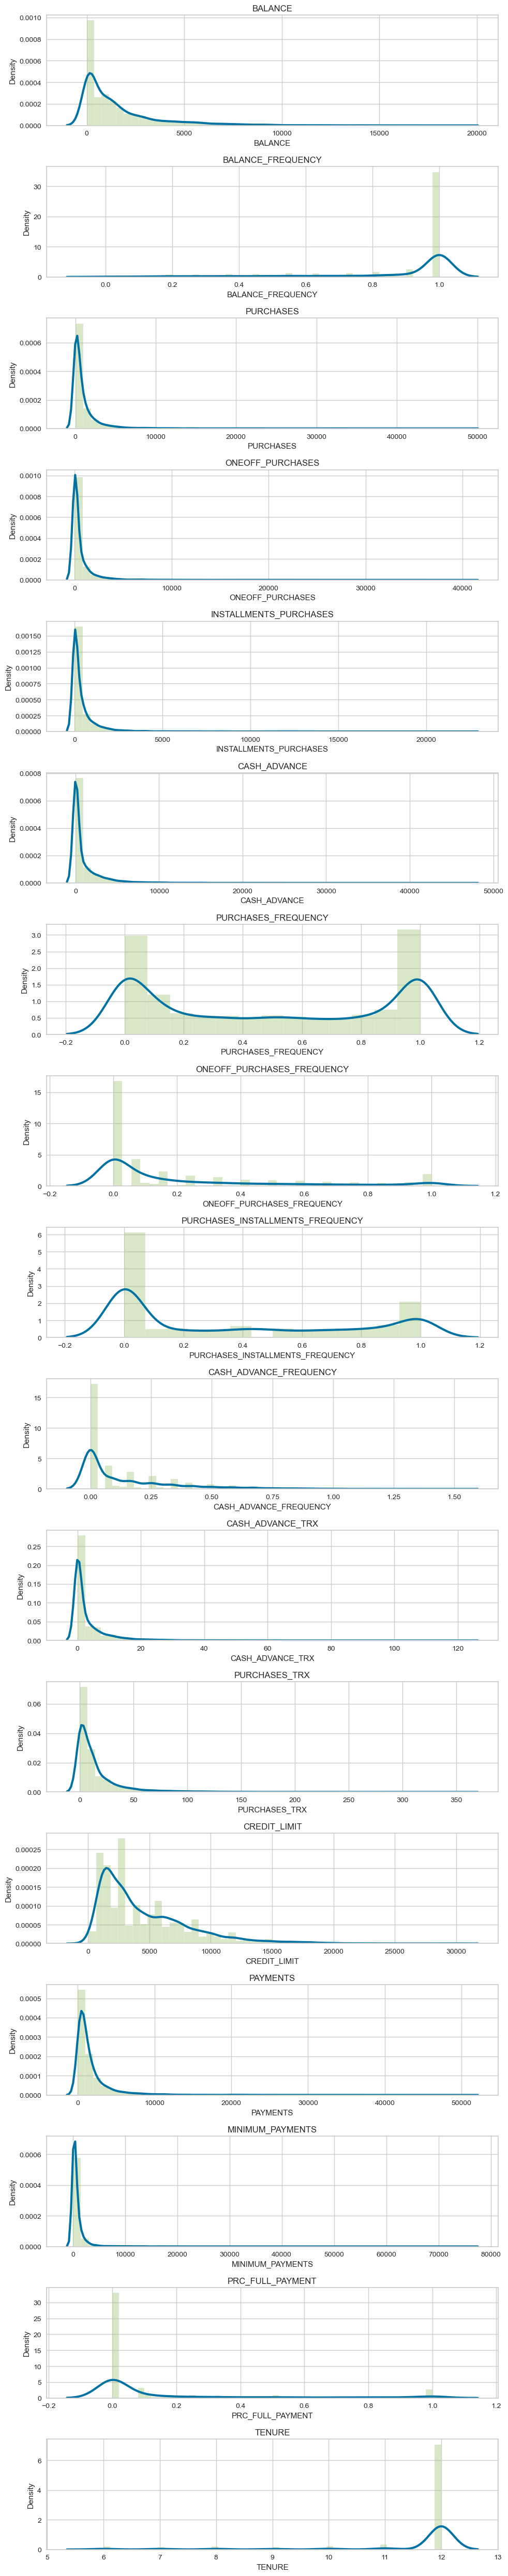

In [174]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [175]:
corr_matrix=creditcard_df.corr()
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.100616,-0.249773,-0.133372


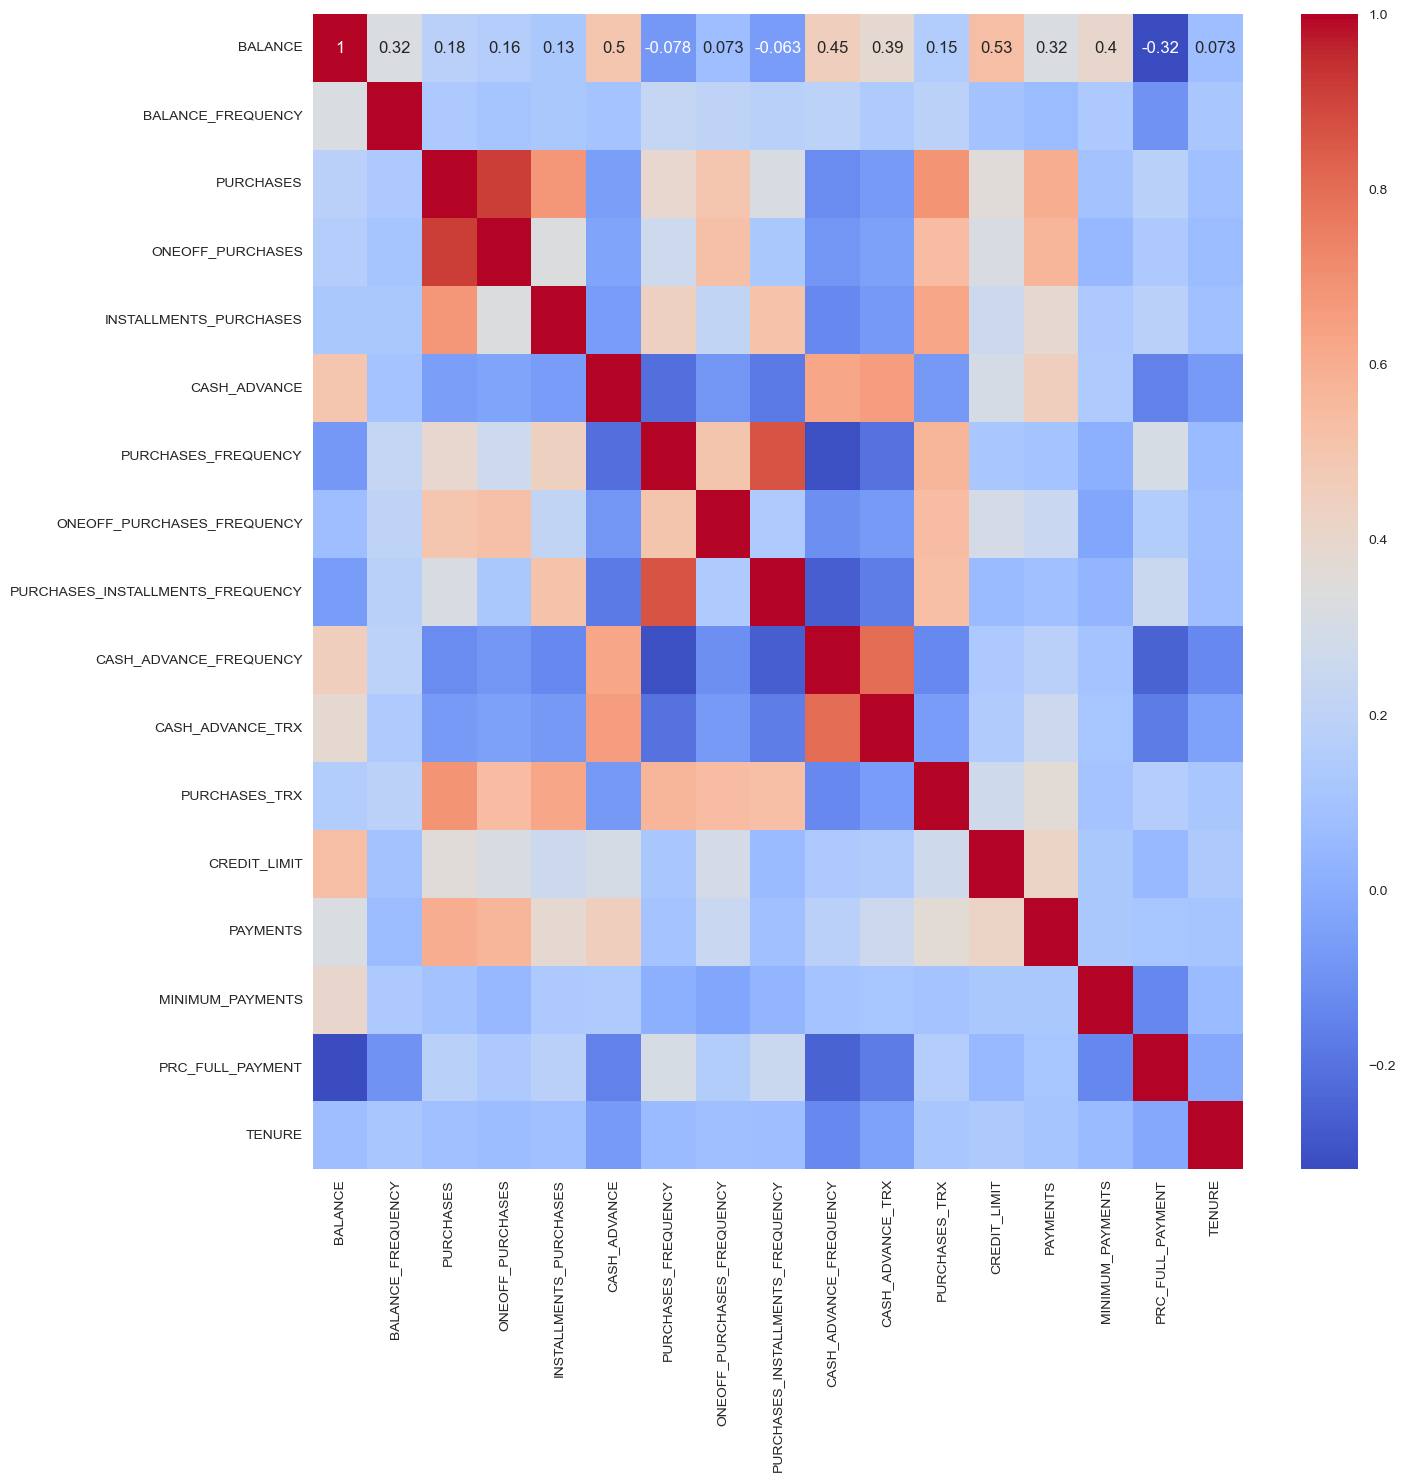

In [176]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [177]:
# We have some highly correlated features, we'll drop them as they have redundant information
creditcard_df.drop('ONEOFF_PURCHASES', axis=1, inplace=True)
creditcard_df.drop('PURCHASES_INSTALLMENTS_FREQUENCY', axis=1, inplace=True)

In [178]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

# export the scaled data to a csv file
pd.DataFrame(creditcard_df_scaled, columns = [creditcard_df.columns]).to_csv("creditcard_df_scaled.csv", index=False)

C:\Users\User\miniconda3\envs\mmakintosh_bank-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\miniconda3\envs\mmakintosh_bank-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\miniconda3\envs\mmakintosh_bank-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\miniconda3\envs\mmakintosh_bank-segmentation\lib\site-packa

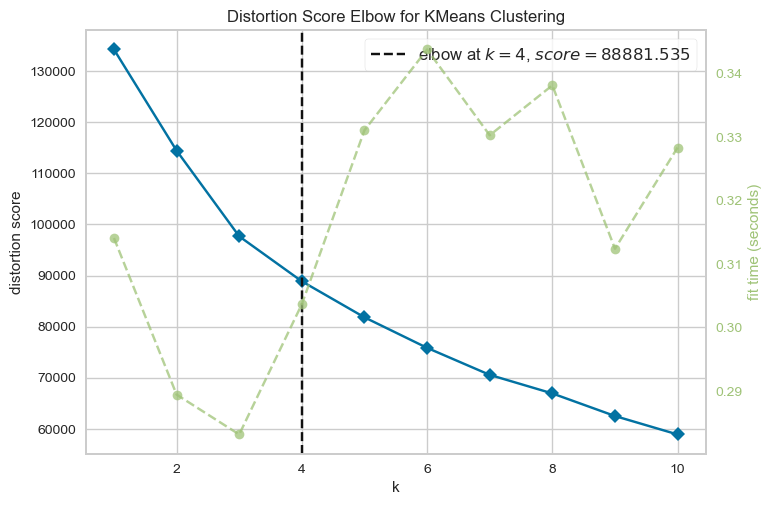

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [179]:
from yellowbrick.cluster import KElbowVisualizer # visualization tool for helping to determine the optimal number of clusters in a dataset. 
from sklearn.cluster import KMeans

# Instantiate the KMeans model
kmeans = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model and the range of clusters to explore
# It will show us the elbow point in the graph
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
# performs the K-Means clustering for each value of k in the specified range and calculates the corresponding score.
visualizer.fit(creditcard_df_scaled)

# Finalize and render the figure
visualizer.show()

So 4 clusters is the best choice for our model

In [180]:
creditcard_df_scaled.shape

(8950, 15)

In [181]:
kmeans = KMeans(4)
labels=kmeans.fit_predict(creditcard_df_scaled)

C:\Users\User\miniconda3\envs\mmakintosh_bank-segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [182]:
# get coordinates of the cluster centers
data = kmeans.cluster_centers_

In [183]:
# create dataframe from the cluster centers
cluster_centers = pd.DataFrame(data, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.301195,-0.418083,-0.352779,-0.357007,-0.198926,-0.682925,-0.460894,-0.124164,-0.178374,-0.458987,-0.381491,-0.286532,-0.130813,-0.258565,-0.116360
1,1.174606,0.460706,3.483717,3.064071,-0.122988,1.161793,1.694708,-0.291403,-0.149802,3.490315,1.546263,2.202739,0.696739,0.396189,0.329242
2,-0.289808,0.341076,0.212103,0.263093,-0.380996,0.965243,0.521293,-0.491948,-0.375438,0.367856,0.026020,-0.076460,-0.094769,0.458264,0.152478
3,1.413340,0.389072,-0.227139,-0.239747,1.622441,-0.480760,-0.218862,1.698166,1.548635,-0.274109,0.795627,0.586616,0.491398,-0.403000,-0.083595


In [184]:
# In order to understand what these numbers mean, let's perform inverse transformation
# transform the data in cluster_centers back to its original form before scaling
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,937.562391,0.778231,249.487586,88.230279,561.714069,0.216260,0.064964,0.110298,2.031559,3.301132,3106.428974,903.661489,539.763886,0.078089,11.361600
1,4009.317469,0.986408,8446.220356,3181.869288,720.958776,0.956634,0.708022,0.076831,2.226537,101.466019,10120.388350,8109.856094,2470.163244,0.269593,11.957929
2,961.264370,0.958068,1456.365582,648.979688,179.905280,0.877749,0.357970,0.036700,0.686739,23.853354,4589.120550,1511.800427,623.843304,0.287749,11.721373
3,4506.223206,0.969438,517.919463,194.267720,4381.205192,0.297399,0.137167,0.474964,13.817121,7.896498,7389.264238,3431.340647,1991.173105,0.035844,11.405447


In [185]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

# export the data to a csv file
creditcard_df_cluster.to_csv("creditcard_df_cluster.csv", index=False)

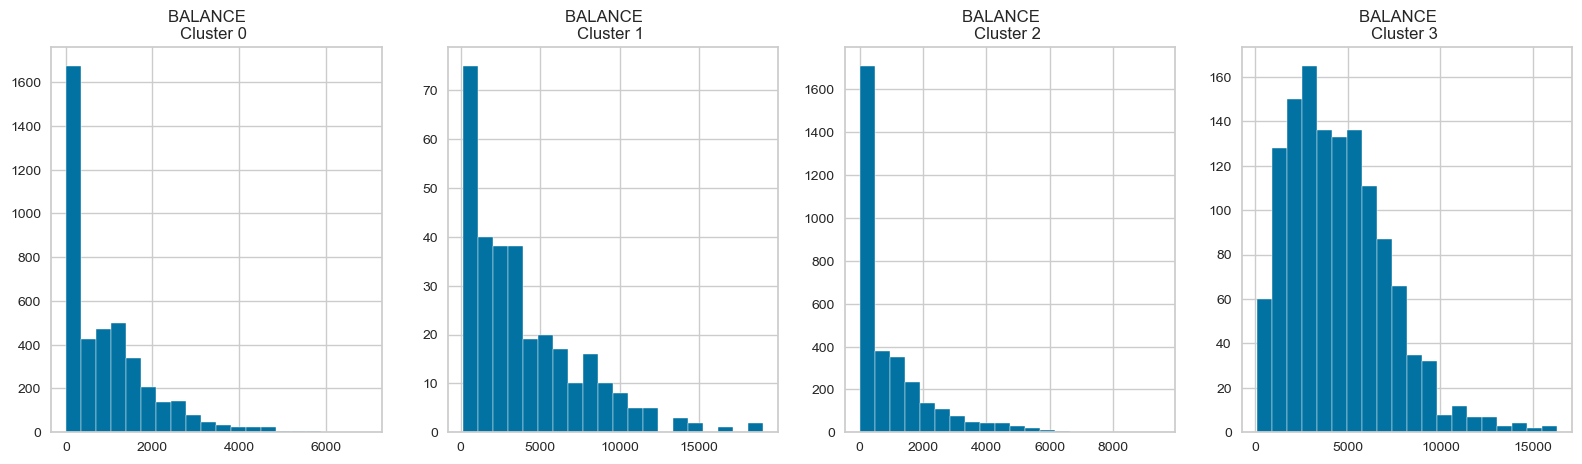

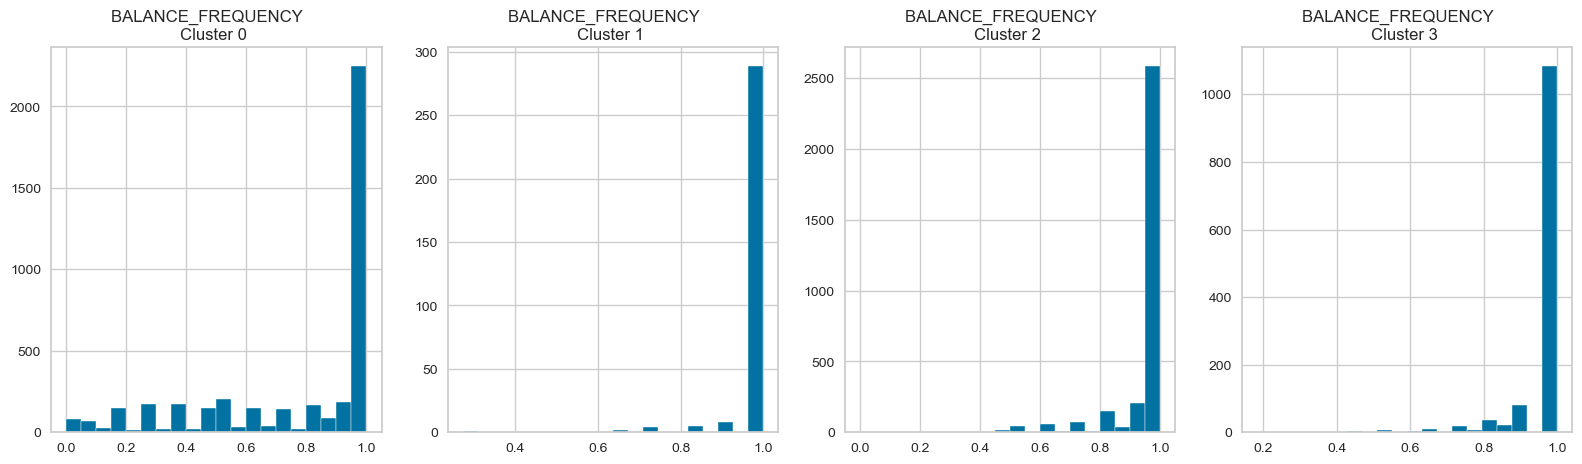

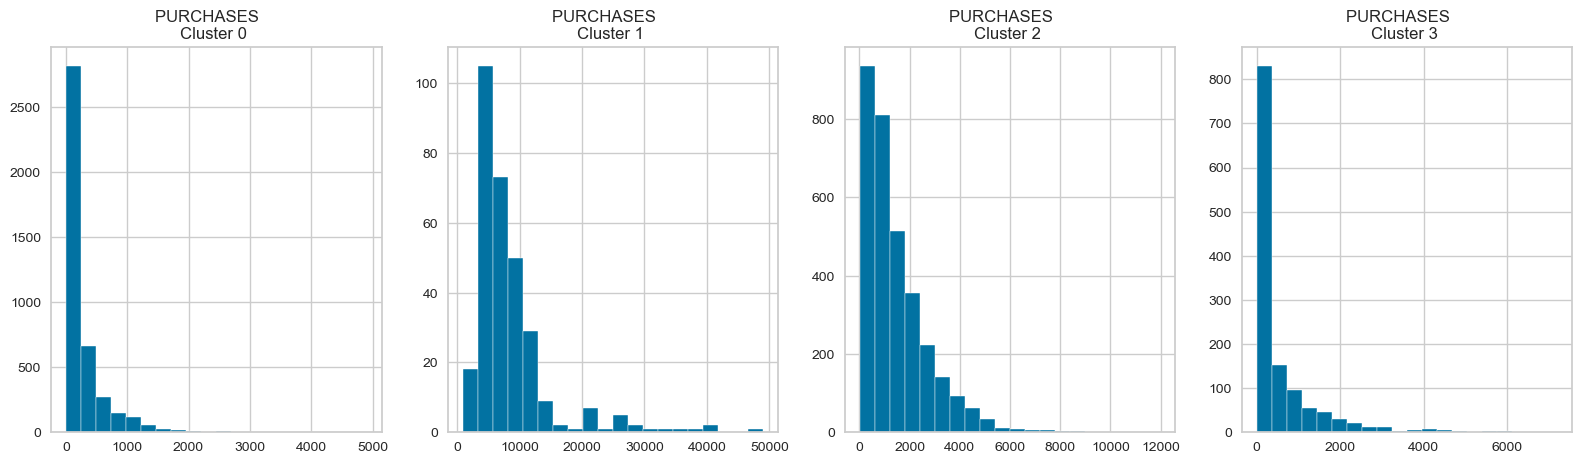

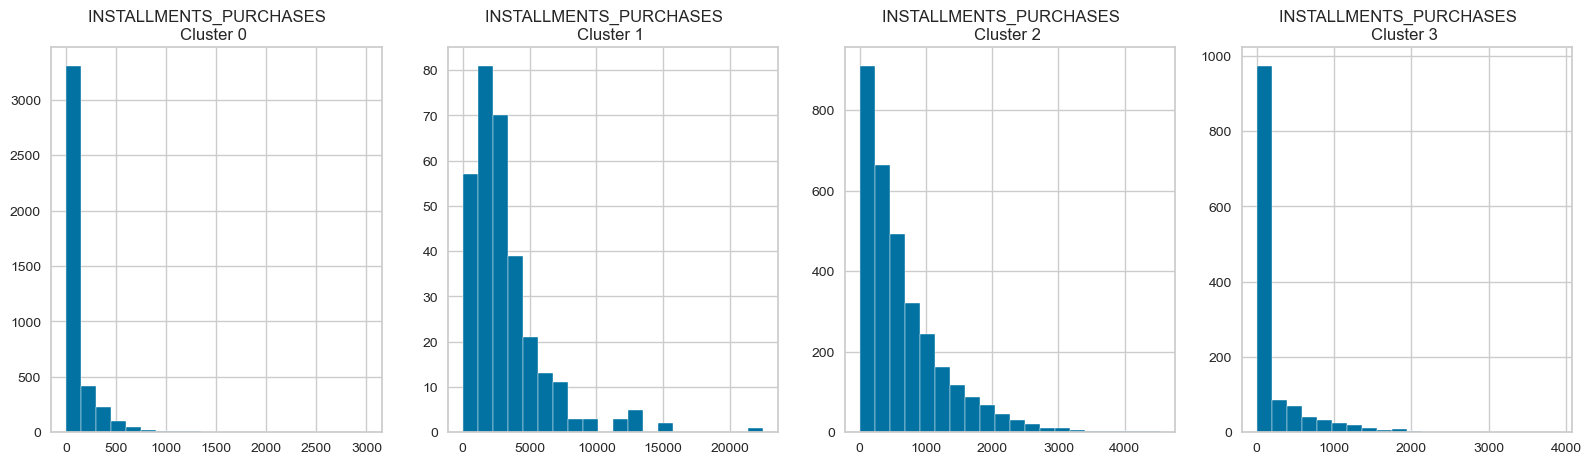

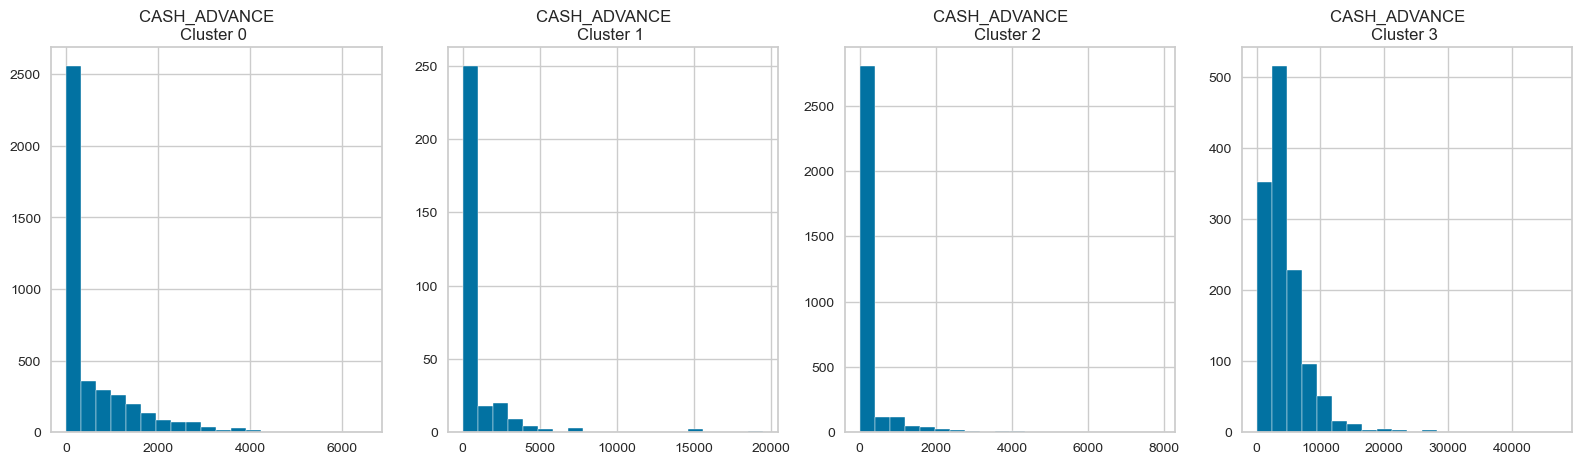

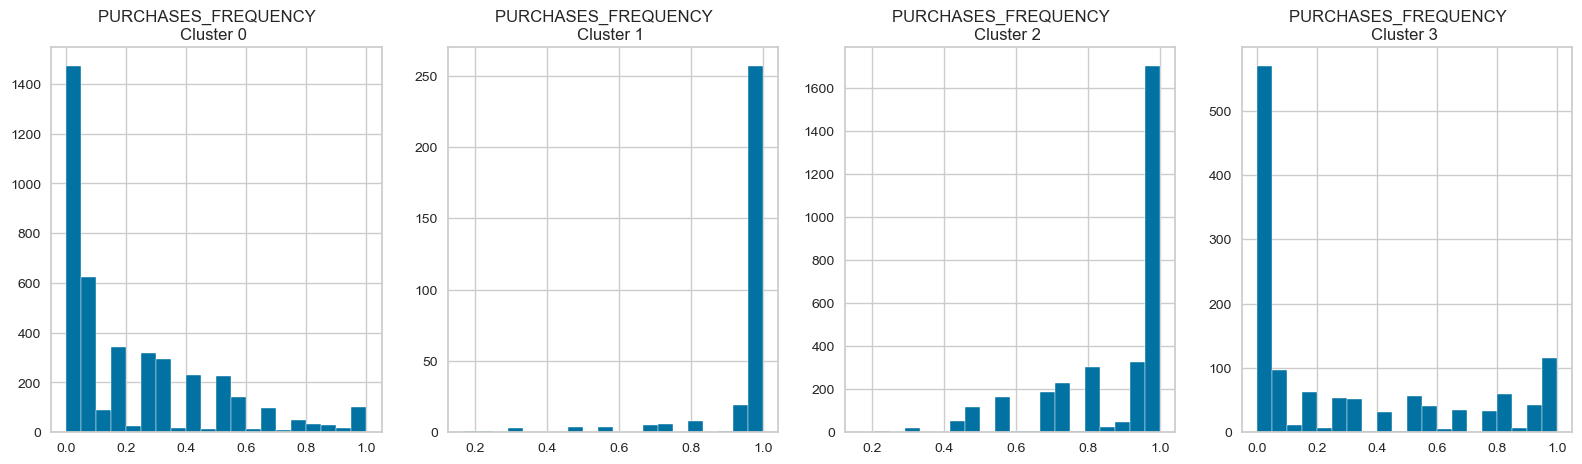

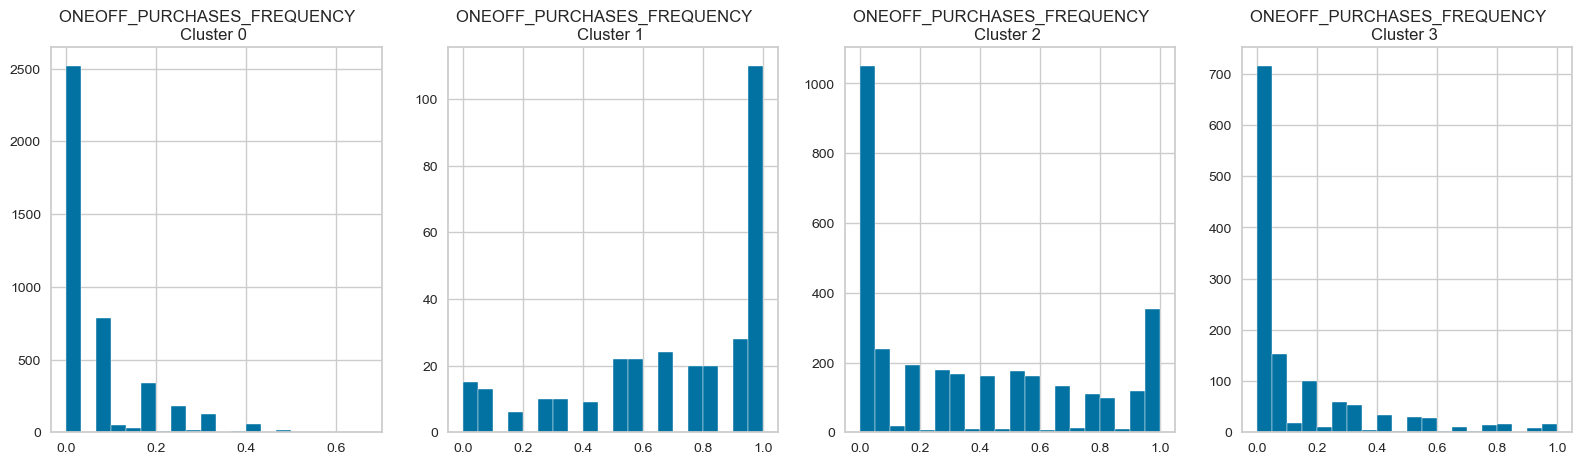

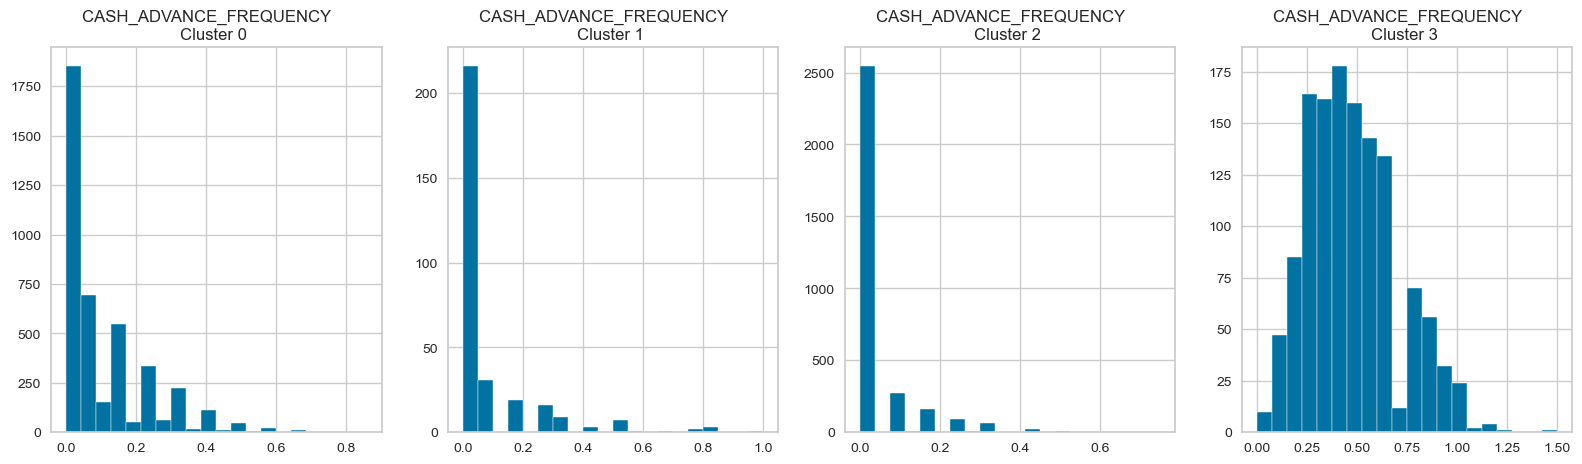

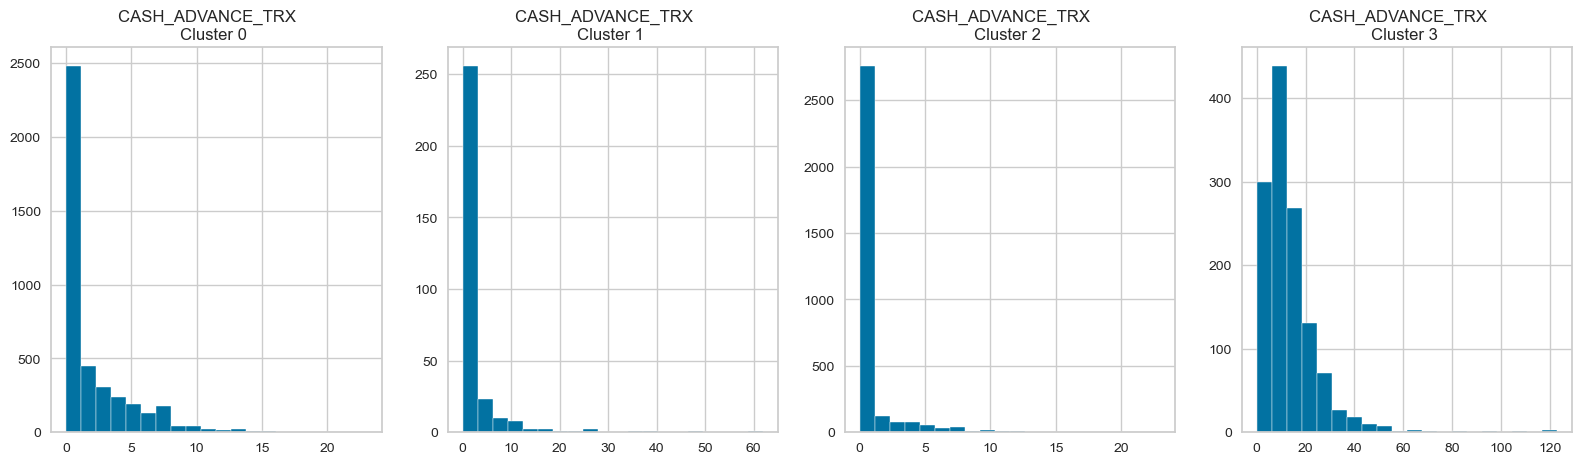

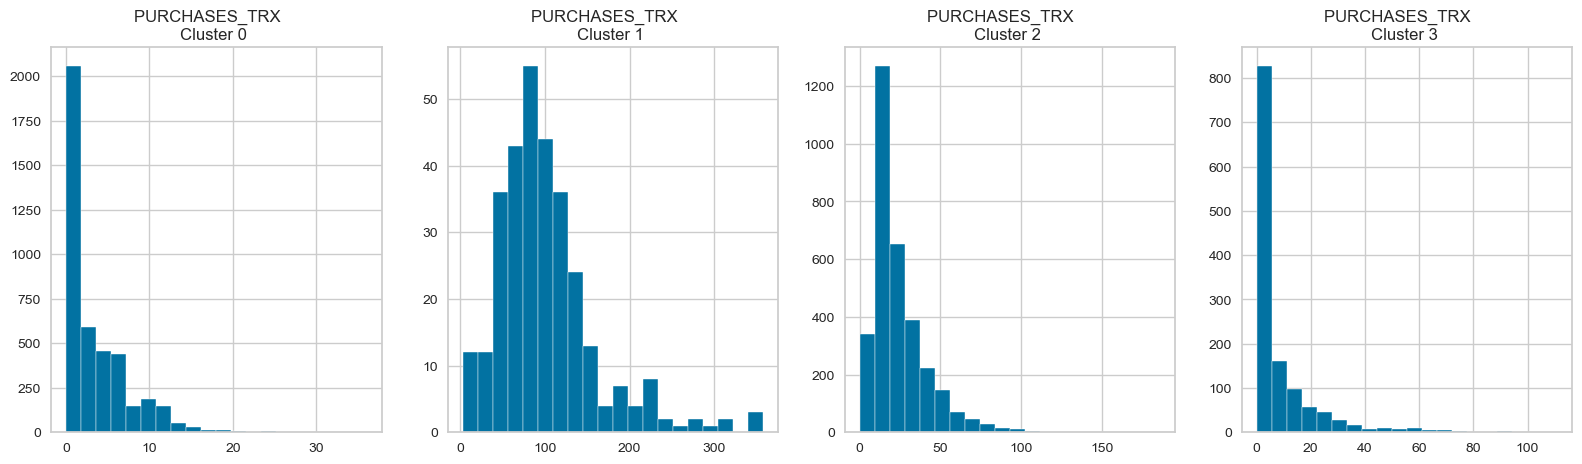

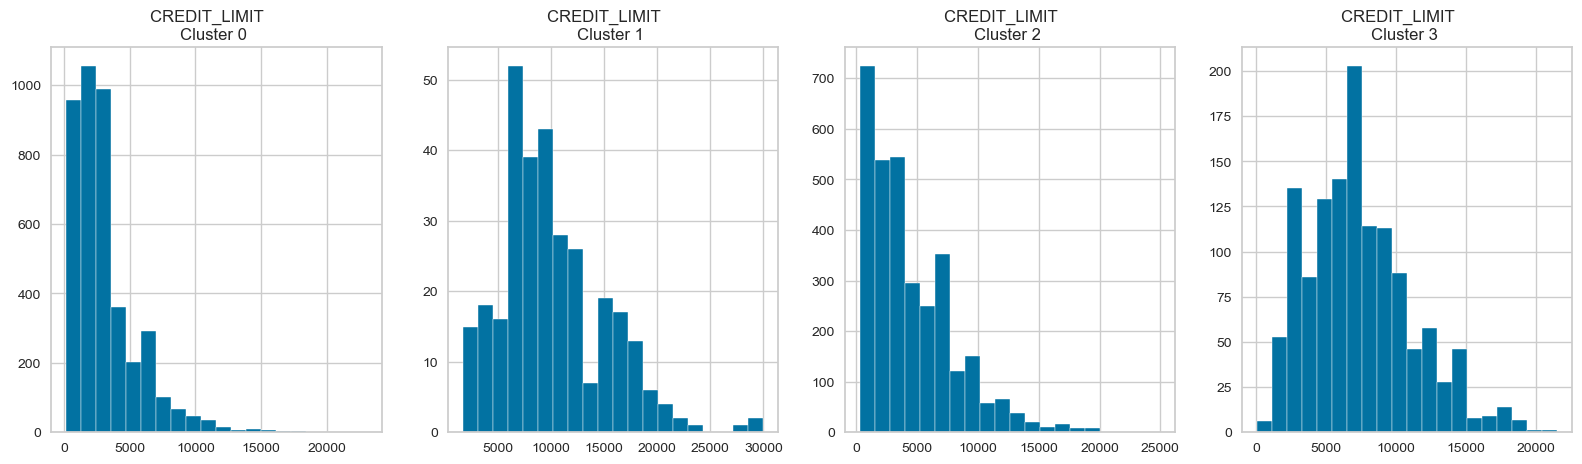

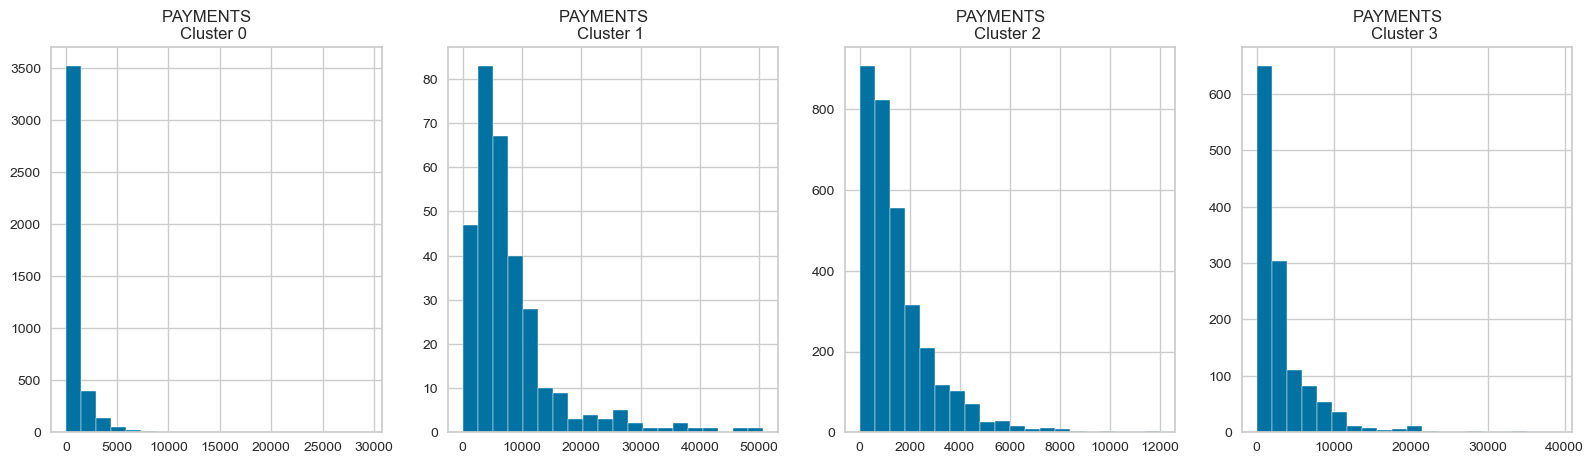

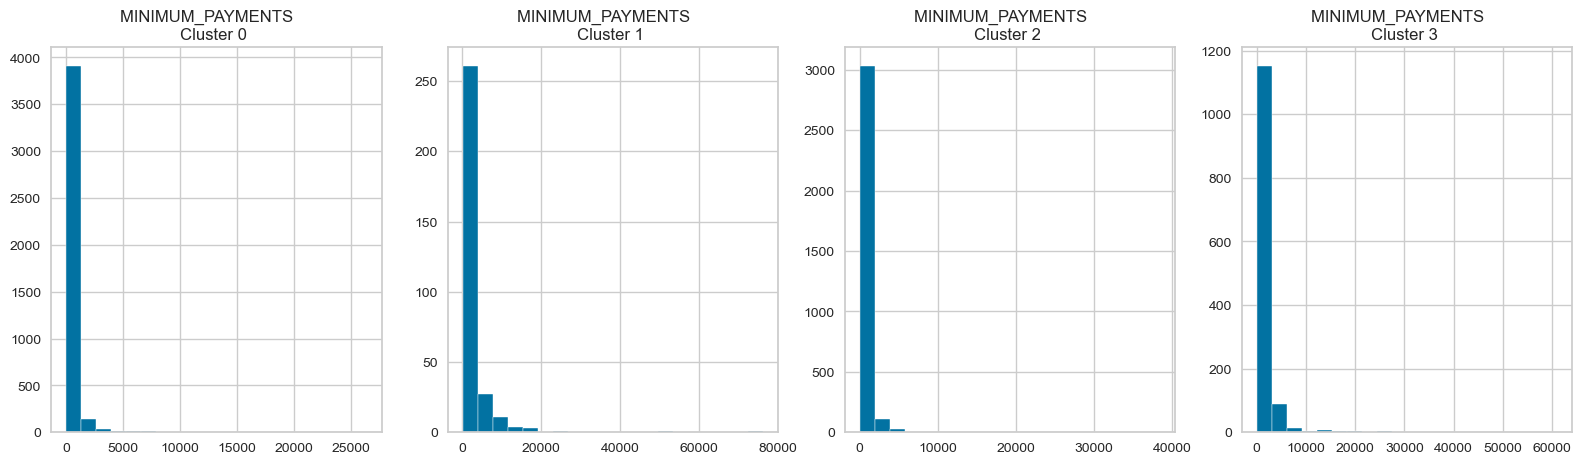

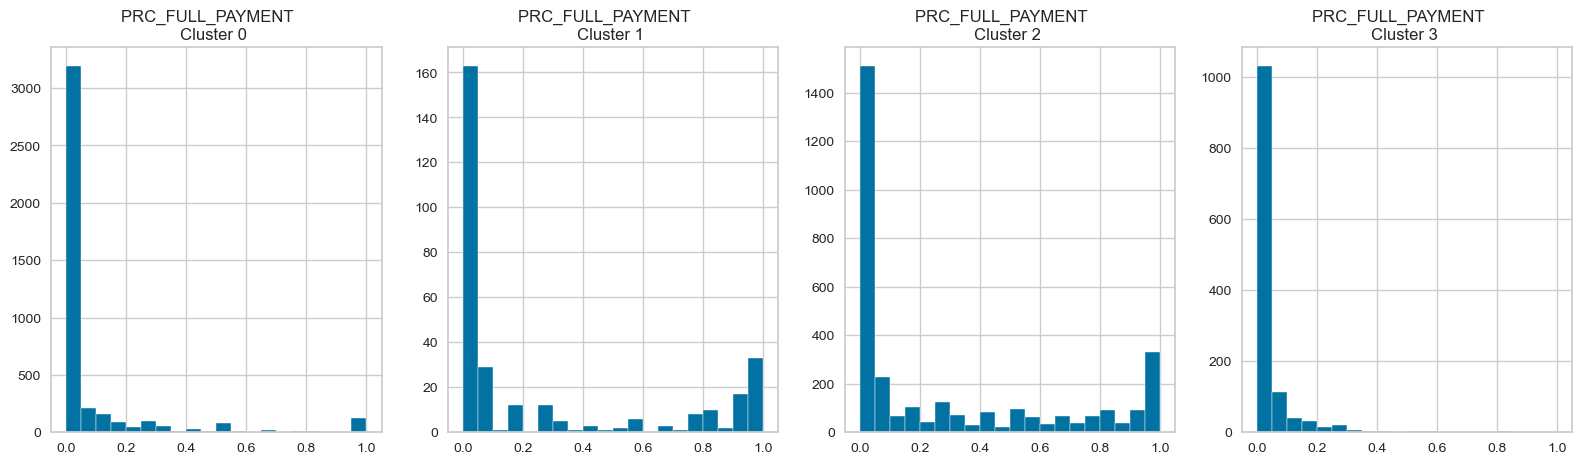

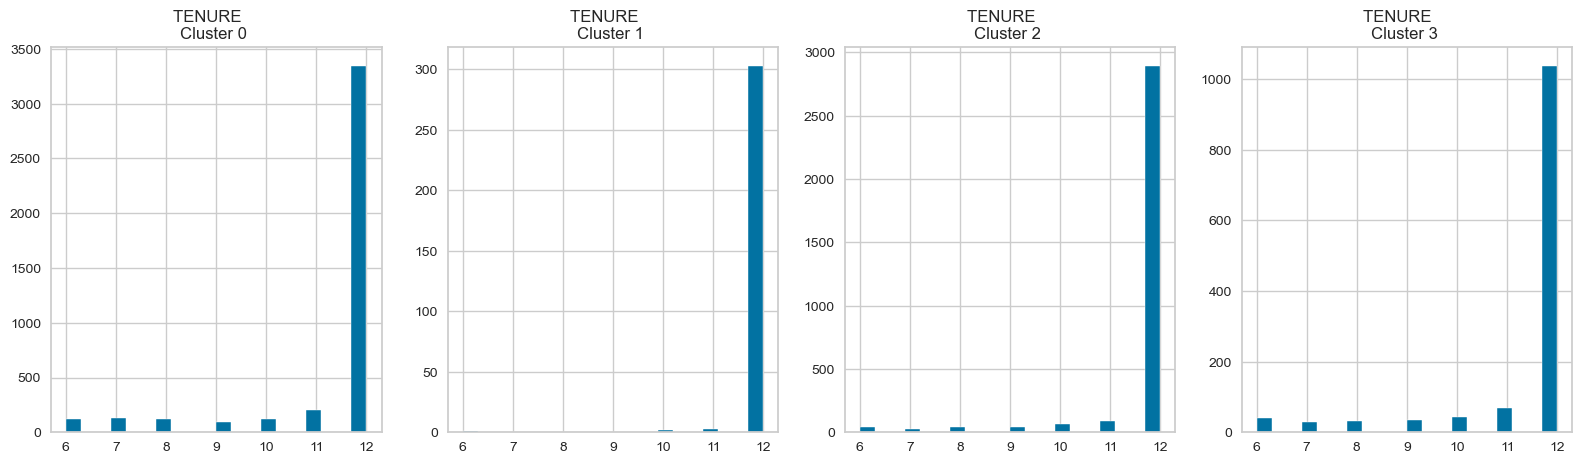

In [186]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()



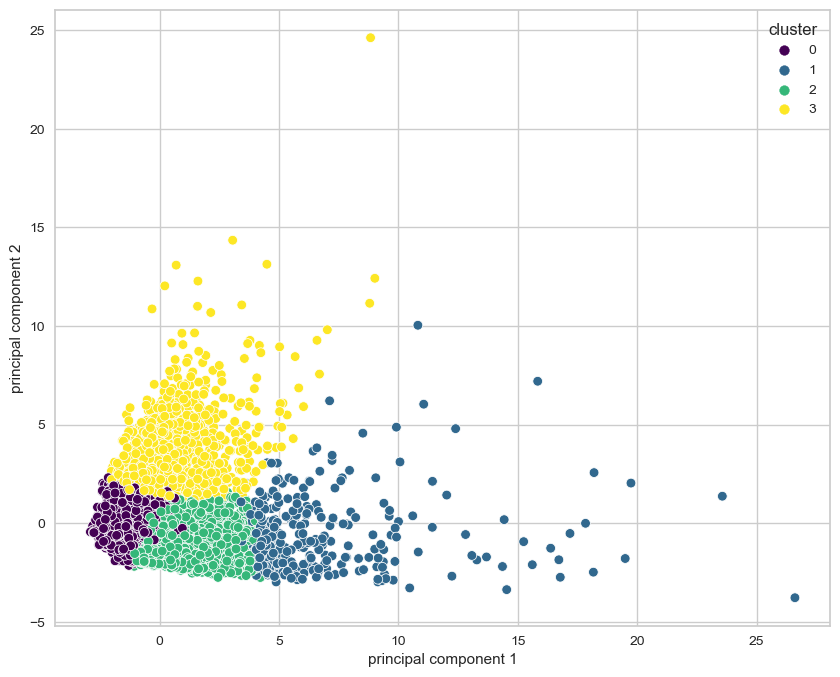

In [187]:
# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(creditcard_df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = creditcard_df_cluster['cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='cluster', palette='viridis')
plt.show()


In [188]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,937.562391,0.778231,249.487586,88.230279,561.714069,0.216260,0.064964,0.110298,2.031559,3.301132,3106.428974,903.661489,539.763886,0.078089,11.361600
1,4009.317469,0.986408,8446.220356,3181.869288,720.958776,0.956634,0.708022,0.076831,2.226537,101.466019,10120.388350,8109.856094,2470.163244,0.269593,11.957929
2,961.264370,0.958068,1456.365582,648.979688,179.905280,0.877749,0.357970,0.036700,0.686739,23.853354,4589.120550,1511.800427,623.843304,0.287749,11.721373
3,4506.223206,0.969438,517.919463,194.267720,4381.205192,0.297399,0.137167,0.474964,13.817121,7.896498,7389.264238,3431.340647,1991.173105,0.035844,11.405447


In [189]:
import pickle

# Assuming 'model' is your trained KMeans model and 'scaler' is the preprocessing scaler
saved_objects = {
    'model': kmeans,
    'scaler': scaler
}

# Save both objects together in a .pkl file
with open('bank_customers_segmenter.pkl', 'wb') as file:
    pickle.dump(saved_objects, file)